#Appendix, Michał Szumielewicz

In [ ]:
import pandas as pd
df = pd.read_csv('churn.csv')

In [ ]:
X = df.drop(['TARGET', df.columns[0]], axis=1)
y = df['TARGET']

In [ ]:
X

,total_day_minutes,total_day_charge,total_eve_minutes,total_eve_charge,total_night_minutes,total_night_charge,total_intl_minutes,total_intl_charge
0,265.1,45.07,197.4,16.78,244.7,11.01,10.0,2.70
1,161.6,27.47,195.5,16.62,254.4,11.45,13.7,3.70
2,243.4,41.38,121.2,10.30,162.6,7.32,12.2,3.29
3,299.4,50.90,61.9,5.26,196.9,8.86,6.6,1.78
4,166.7,28.34,148.3,12.61,186.9,8.41,10.1,2.73
...,...,...,...,...,...,...,...,...
4995,235.7,40.07,223.0,18.96,297.5,13.39,9.9,2.67
4996,184.2,31.31,256.8,21.83,213.6,9.61,14.7,3.97
4997,140.6,23.90,172.8,14.69,212.4,9.56,13.6,3.67
4998,188.8,32.10,171.7,14.59,224.4,10.10,8.5,2.30


I use the churn dataset with 5000 rows of 8 features and a target class.

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
!pip install dalex

In [ ]:
import dalex as dx

In [ ]:
model = GradientBoostingClassifier()
model.fit(X, y)
explainer = dx.Explainer(model, X, y)

Preparation of a new explainer is initiated

  -> data              : 5000 rows 8 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 5000 values
  -> model_class       : sklearn.ensemble._gb.GradientBoostingClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7a4712060d30> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0193, mean = 0.141, max = 0.981
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.873, mean = -6.4e-05, max = 0.949
  -> model_info        : package sklearn

A new explainer has been created!


X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names


In [ ]:
observations = [X.iloc[[0]],X.iloc[[1]],X.iloc[[2]],X.iloc[[3]]]

#Compare LIME for various observations in the dataset. How stable are these explanations?

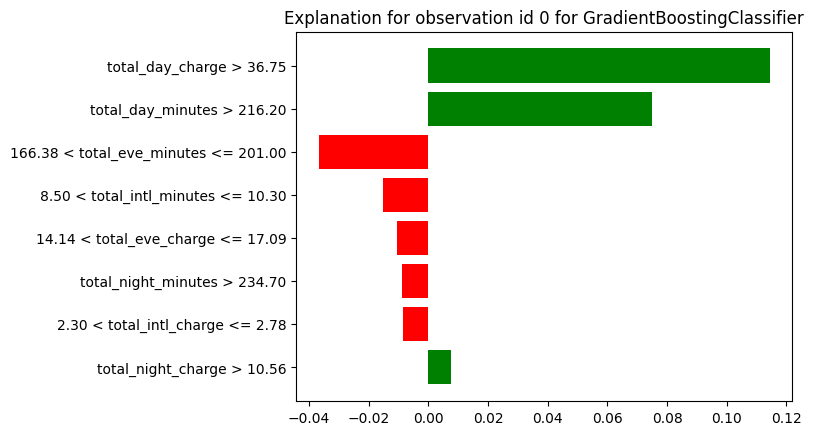

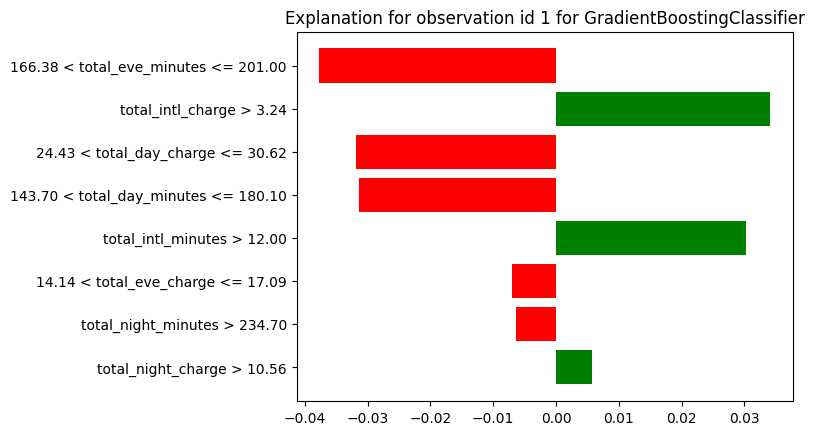

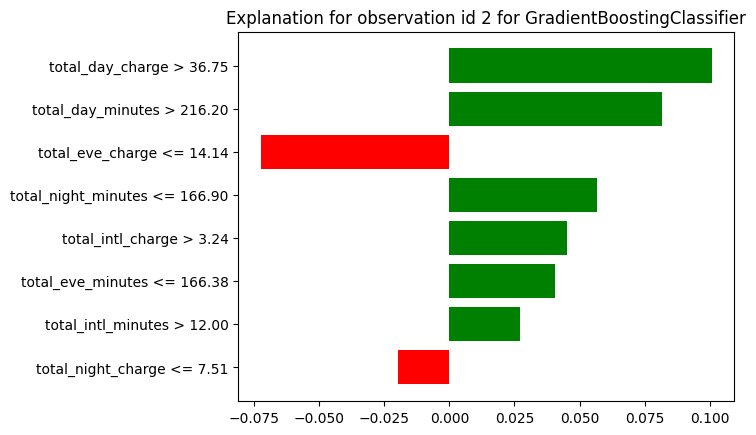

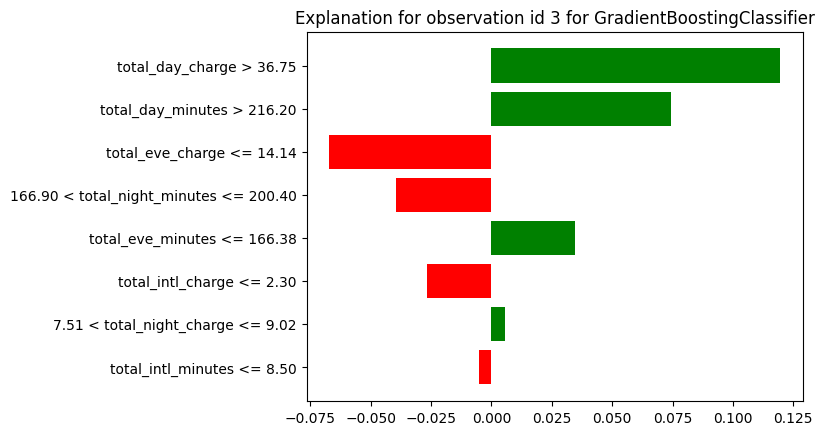

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

for i,observation in enumerate(observations):
    exp = explainer.predict_surrogate(observation)
    exp.plot(return_figure=True)
    plt.title(f'Explanation for observation id {i} for GradientBoostingClassifier')

The class probability values in the explanations based on the same conditions differ across various observations although they still tend to be similar, especially those with the greatest absolute values in the explanations. The ones less important can have big differences in terms of relative value.

In [ ]:
!pip install shap
import shap

#Compare LIME with the explanations obtained using SHAP. What are the main differences between them?

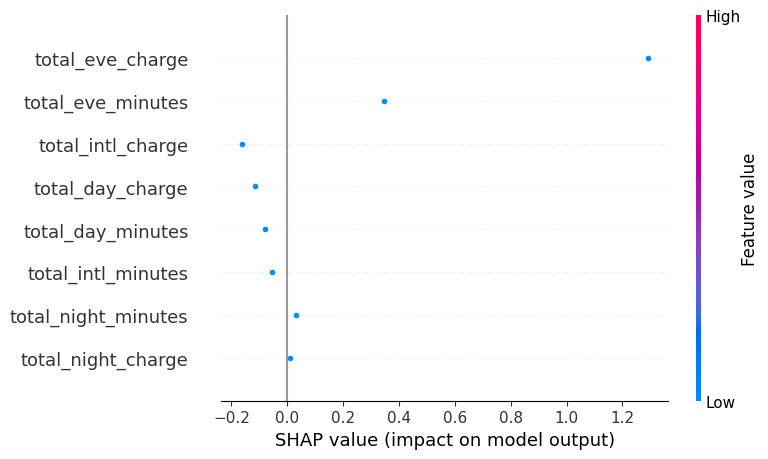

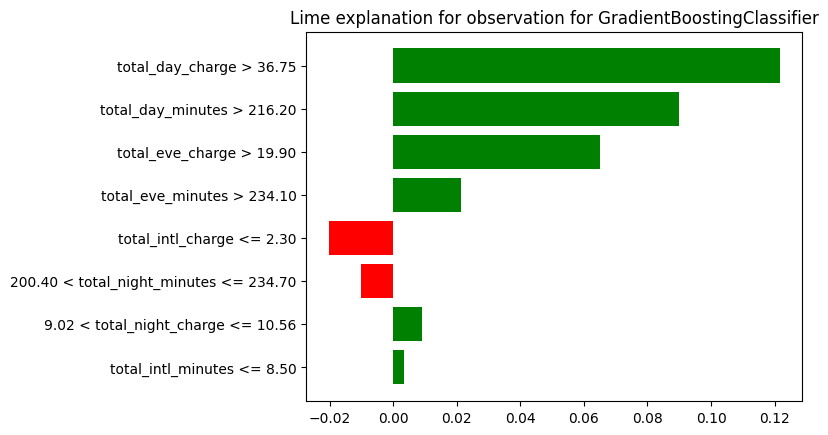

In [ ]:
explainer2 = shap.TreeExplainer(model)

observation = X.iloc[[6]]

shap_values = explainer2.shap_values(observation)
shap.summary_plot(shap_values, observation, feature_names=X.columns)
exp = explainer.predict_surrogate(observation)
exp.plot(return_figure=True)
plt.title(f'Lime explanation for observation for GradientBoostingClassifier')
plt.show()

SHAP can sometimes have vastly different explanations than LIME. The seemingly most important factor for the class (if the customer churned) according to LIME is a factor slightly against the class according to SHAP.

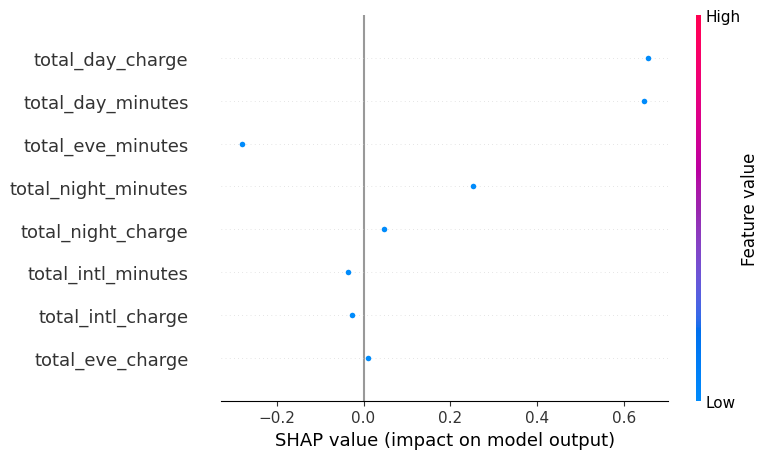

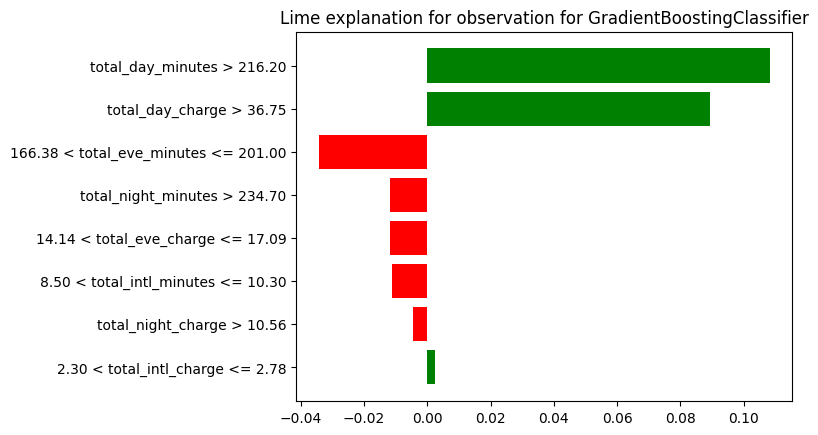

In [ ]:
observation = X.iloc[[0]]

shap_values = explainer2.shap_values(observation)
shap.summary_plot(shap_values, observation, feature_names=X.columns)
exp = explainer.predict_surrogate(observation)
exp.plot(return_figure=True)
plt.title(f'Lime explanation for observation for GradientBoostingClassifier')
plt.show()

They can however explain things very similarly in other cases (except the total_night_minutes one)

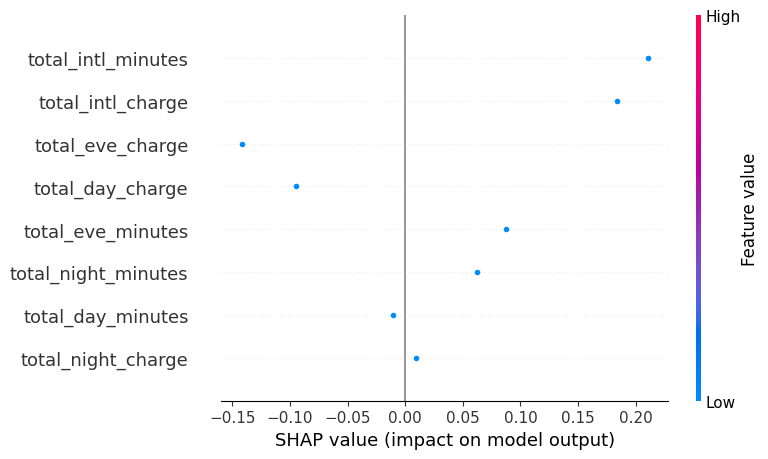

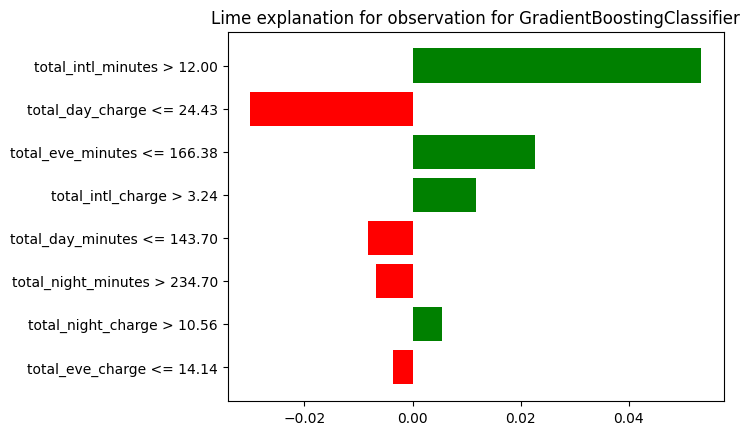

In [ ]:
observation = X.iloc[[30]]

shap_values = explainer2.shap_values(observation)
shap.summary_plot(shap_values, observation, feature_names=X.columns)
exp = explainer.predict_surrogate(observation)
exp.plot(return_figure=True)
plt.title(f'Lime explanation for observation for GradientBoostingClassifier')
plt.show()

The main differences between LIME and SHAP explanations seem to be mainly in terms of values of the different factors while they generally agree on the "direction" of the impact.

In [ ]:
model2 = RandomForestClassifier()
model2.fit(X, y)
explainer3 = dx.Explainer(model2, X, y)

Preparation of a new explainer is initiated

  -> data              : 5000 rows 8 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 5000 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7a4712060d30> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.145, max = 0.99
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.48, mean = -0.00347, max = 0.49
  -> model_info        : package sklearn

A new explainer has been created!


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


#Compare LIME between at least two different models. Are there any systematic differences across many observations?

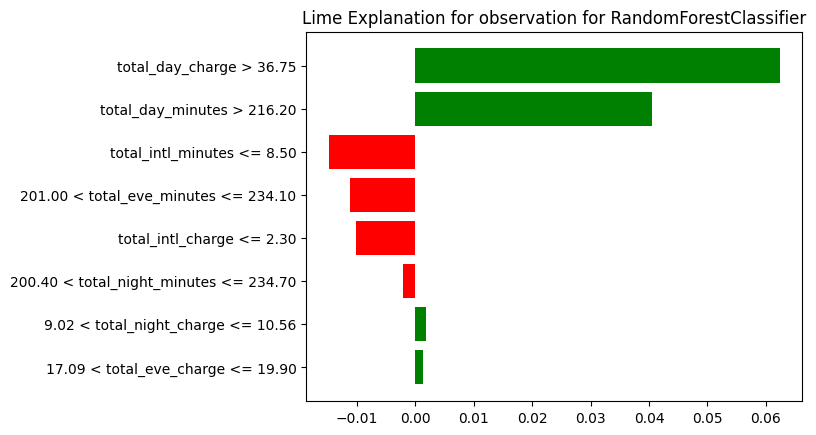

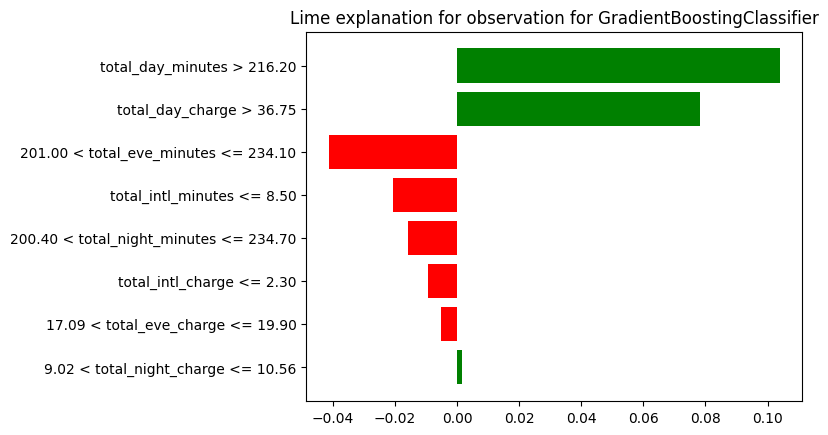

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

observation = X.iloc[[5]]

exp = explainer3.predict_surrogate(observation)
exp.plot(return_figure=True)
plt.title(f'Lime Explanation for observation for RandomForestClassifier')

exp = explainer.predict_surrogate(observation)
exp.plot(return_figure=True)
plt.title(f'Lime explanation for observation for GradientBoostingClassifier')
plt.show()

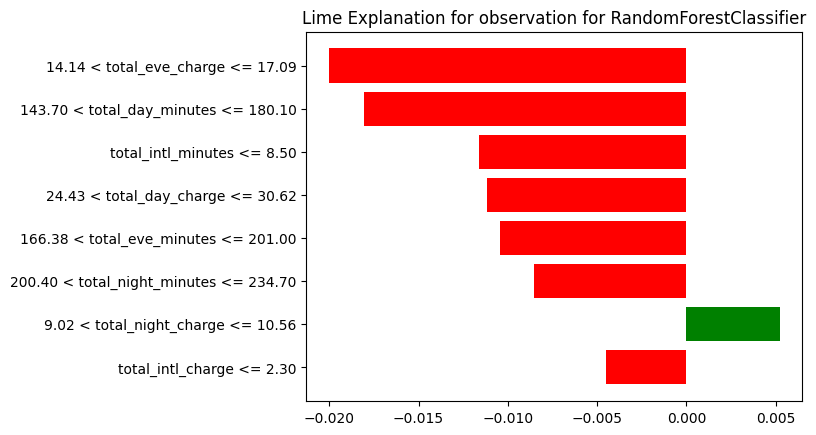

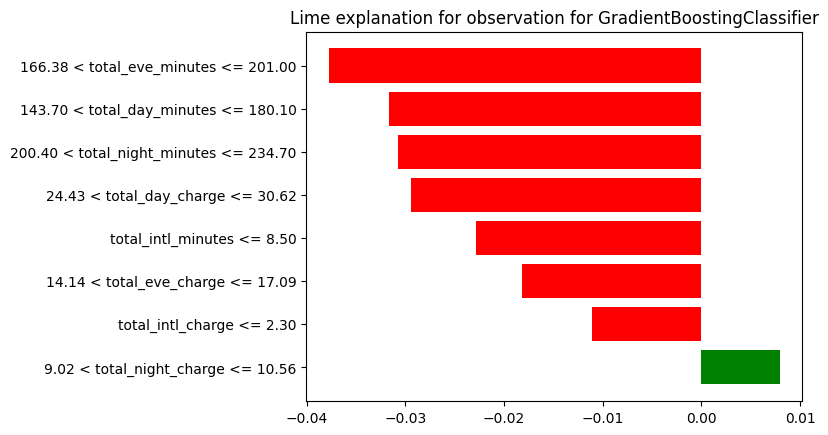

In [ ]:
observation = X.iloc[[34]]

exp = explainer3.predict_surrogate(observation)
exp.plot(return_figure=True)
plt.title(f'Lime Explanation for observation for RandomForestClassifier')

exp = explainer.predict_surrogate(observation)
exp.plot(return_figure=True)
plt.title(f'Lime explanation for observation for GradientBoostingClassifier')
plt.show()

In some cases LIME explanations of 2 classifiers' predictions can be really similar where the biggest differences are results of models seemingly deeming one of 2 codependent variables more important than the other, here exemplified by swapping day charges and day minutes (duration of calls)

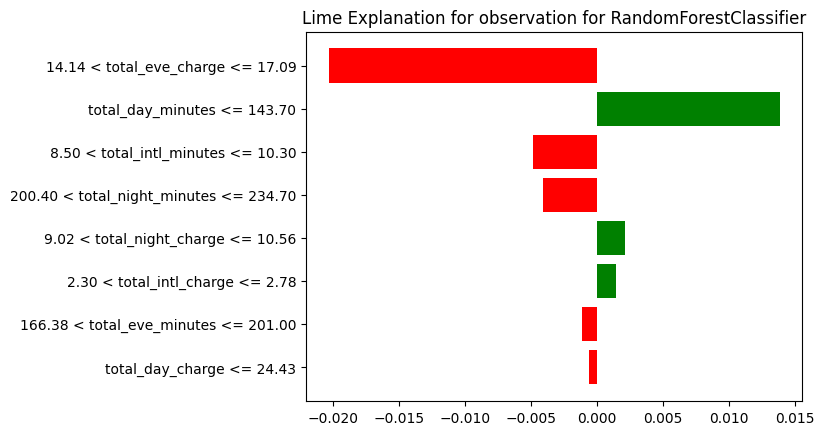

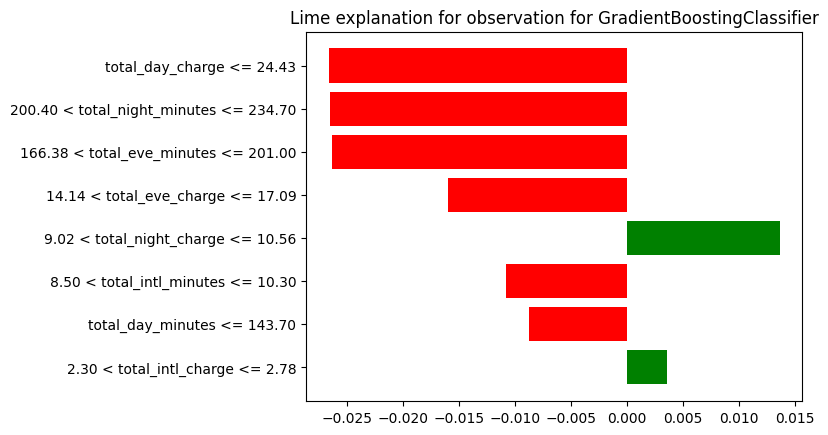

In [ ]:
observation = X.iloc[[114]]

exp = explainer3.predict_surrogate(observation)
exp.plot(return_figure=True)
plt.title(f'Lime Explanation for observation for RandomForestClassifier')

exp = explainer.predict_surrogate(observation)
exp.plot(return_figure=True)
plt.title(f'Lime explanation for observation for GradientBoostingClassifier')
plt.show()

 In other cases like this the explanations differ greatly.

It seems like the differences in explanations across models are mainly the result of differences in models themselves, placing more emphasis on particular features, especially when features are very strongly correlated in a dataset, like time spent talking and amount paid for that time so that the features convey the same thing for a simple model and their relative importance seems to be mainly chance.